In [75]:
import sys, os
import numpy as np
import cv2
import pickle
import matplotlib.pyplot as plt

In [76]:
def load_fea(feapath):
    with open(feapath, "rb") as fin:
        data = pickle.load(fin)
    return data

In [77]:
data = load_fea("f43b9af15990f7de.pickle")
data.keys()

dict_keys(['locations', 'descriptors', 'scores', 'attention'])

In [78]:
print(data["attention"].shape)
print(data["locations"])

(1, 1, 38, 50)
[[ 90.51054  158.39345 ]
 [208.        80.      ]
 [ 90.510544 158.39345 ]
 ...
 [256.       272.      ]
 [158.39345  203.64871 ]
 [160.       432.      ]]


In [79]:
img = cv2.imread("f43b9af15990f7de.jpg")
img.shape

(600, 800, 3)

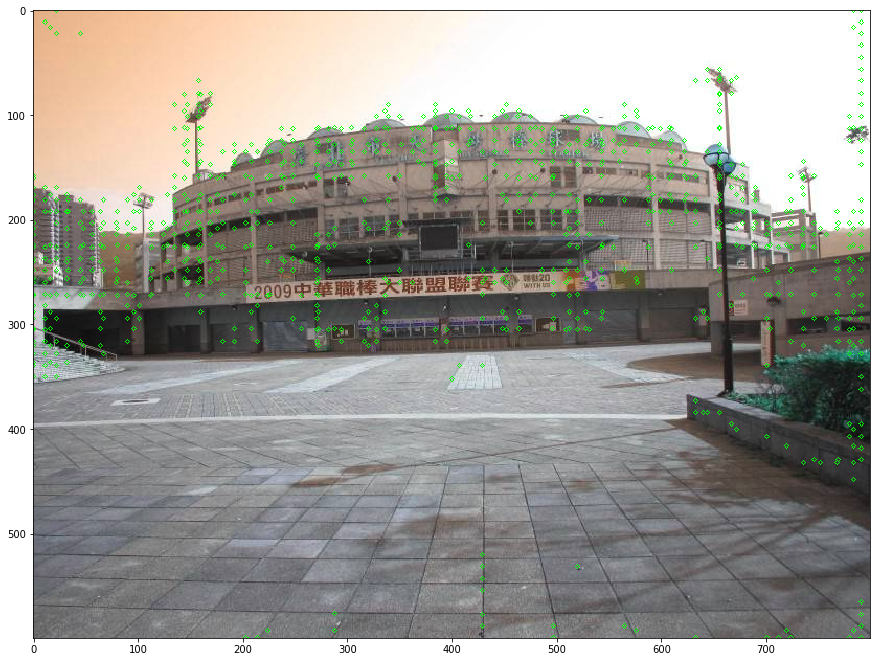

In [80]:
points = data["locations"]
for i in range(len(points)):
    point = points[i]
    #point(y,x)
    cv2.circle(img, (int(point[1]),int(point[0])), 2, (0, 255, 0), 1)
fig = plt.figure(figsize=(15, 20), frameon=False)
im_point = plt.imshow(img)
plt.show()

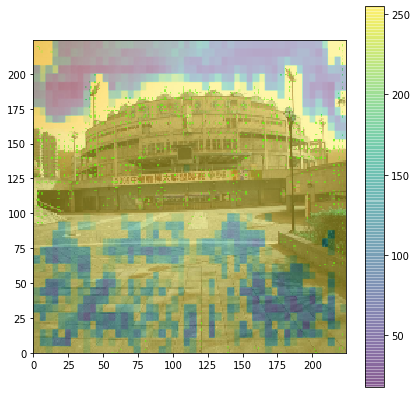

In [81]:
fig = plt.figure(figsize=(7, 7), frameon=False)
extent = 0, 224, 0, 224
img = cv2.resize(img, (224, 224))
im1 = plt.imshow(img, extent=extent)
heatmap = cv2.resize(np.squeeze(data["attention"]), (224, 224), fx=0, fy=0, interpolation=cv2.INTER_NEAREST)
im2 = plt.imshow(heatmap, cmap=plt.cm.viridis, alpha=.4, interpolation='bilinear', extent=extent)
plt.colorbar()
plt.show()